In [1]:
# 安装Python库rpy2
!pip install rpy2

# 安装R包INLA及其依赖包
!R -e "install.packages(c('sp', 'fmesher'), repos=c('http://cran.r-project.org'))"
!R -e "install.packages('INLA', repos='https://inla.r-inla-download.org/R/stable')"


R version 4.3.3 (2024-02-29) -- "Angel Food Cake"
Copyright (C) 2024 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> install.packages(c('sp', 'fmesher'), repos=c('http://cran.r-project.org'))
Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘s2’, ‘units’, ‘sf’, ‘Rcpp’

trying URL 'http://cran.r-project.org/src/contrib/p

In [2]:
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr

# 自动转换Pandas DataFrame为R的data.frame
pandas2ri.activate()

# 加载R的INLA库
inla = importr('INLA')
base = importr('base')

In [3]:
import pandas as pd

# 加载数据
data_path = "/content/TestData_California.csv"
df = pd.read_csv(data_path)


In [4]:
import pandas as pd
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.rinterface_lib.embedded import RRuntimeError

# 激活Pandas DataFrame到R data.frame的自动转换
pandas2ri.activate()

# 尝试加载INLA库，捕获任何错误
try:
    inla = ro.r('library(INLA)')
except RRuntimeError as e:
    print(f"Failed to load INLA library in R: {e}")

def run_inla_model(formula, data):
    """
    使用INLA运行贝叶斯层次模型。
    :param formula: R风格的模型公式字符串。
    :param data: 数据集，Pandas DataFrame格式。
    """
    try:
        # 将Pandas DataFrame转换为R的data.frame
        r_df = pandas2ri.py2rpy(data)

        # 设置R全局环境中的数据框
        ro.globalenv['r_df'] = r_df

        # 运行INLA模型
        model_fit = ro.r(f"""
        inla(formula = '{formula}', data = r_df, family = 'gaussian',
             control.predictor = list(compute = TRUE))
        """)

        # 打印模型摘要
        print(ro.r('summary')(model_fit))
    except RRuntimeError as e:
        print(f"Error running INLA model: {e}")

# 加载数据
df = pd.read_csv('/content/TestData_California.csv')

# 定义模型公式
model_formulas = {
    "Model 1": "SentimentScore ~ HeatCount"
}

# 运行模型
for model_name, formula in model_formulas.items():
    print(f"Running {model_name} with formula: {formula}")
    run_inla_model(formula, df)
    print("\n" + "="*50 + "\n")


Running Model 1 with formula: SentimentScore ~ HeatCount


/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():



 *** inla.core.safe:  The inla program failed, but will rerun in case better initial values may help. try=1/1 


  object 'y...fake' not found
The inla program failed and the maximum number of tries has been reached.



Error running INLA model: Error in inla.core.safe(formula = formula, family = family, contrasts = contrasts,  : 
  object 'y...fake' not found
The inla program failed and the maximum number of tries has been reached.





In [5]:
import pandas as pd
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

# 激活Pandas DataFrame到R data.frame的自动转换
pandas2ri.activate()

# 加载R的INLA库
ro.r('library(INLA)')

def run_inla_model(formula, data):
    """
    使用INLA运行贝叶斯层次模型。
    :param formula: R风格的模型公式字符串。
    :param data: 数据集，Pandas DataFrame格式。
    """
    with localconverter(ro.default_converter + pandas2ri.converter):
        r_df = ro.conversion.py2rpy(data)

    # 构建R中的INLA模型调用字符串
    inla_call = f"""
    result <- inla(formula = {formula}, data = r_df, family = 'gaussian',
                   control.predictor = list(compute = TRUE))
    """

    # 在R环境中执行INLA模型调用
    ro.r(inla_call)

    # 获取模型结果并打印摘要
    ro.r('print(summary(result))')

# 加载你的数据
df = pd.read_csv('/content/TestData_California.csv')  # 确保路径与你的文件匹配

# 定义模型公式
model_formulas = {
    "Model 1": "SentimentScore ~ HeatCount"
}

# 运行模型
for model_name, formula in model_formulas.items():
    print(f"Running {model_name} with formula: {formula}")
    run_inla_model(formula, df)
    print("\n" + "="*50 + "\n")


Running Model 1 with formula: SentimentScore ~ HeatCount


/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():



Call:
   c("inla.core(formula = formula, family = family, contrasts = contrasts, 
   ", " data = data, quantiles = quantiles, E = E, offset = offset, ", " 
   scale = scale, weights = weights, Ntrials = Ntrials, strata = strata, 
   ", " lp.scale = lp.scale, link.covariates = link.covariates, verbose = 
   verbose, ", " lincomb = lincomb, selection = selection, control.compute 
   = control.compute, ", " control.predictor = control.predictor, 
   control.family = control.family, ", " control.inla = control.inla, 
   control.fixed = control.fixed, ", " control.mode = control.mode, 
   control.expert = control.expert, ", " control.hazard = control.hazard, 
   control.lincomb = control.lincomb, ", " control.update = 
   control.update, control.lp.scale = control.lp.scale, ", " 
   control.pardiso = control.pardiso, only.hyperparam = only.hyperparam, 
   ", " inla.call = inla.call, inla.arg = inla.arg, num.threads = 
   num.threads, ", " keep = keep, working.directory = working.directory,

In [6]:
import pandas as pd
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

# 激活Pandas DataFrame到R data.frame的自动转换
pandas2ri.activate()

# 加载R的INLA库
ro.r('library(INLA)')

def run_inla_model(formula, data):
    """
    使用INLA运行贝叶斯层次模型。
    :param formula: R风格的模型公式字符串。
    :param data: 数据集，Pandas DataFrame格式。
    """
    with localconverter(ro.default_converter + pandas2ri.converter):
        r_df = ro.conversion.py2rpy(data)

    # 构建R中的INLA模型调用字符串
    inla_call = f"""
    result <- inla(formula = {formula}, data = r_df, family = 'gaussian',
                   control.predictor = list(compute = TRUE))
    """

    # 在R环境中执行INLA模型调用
    ro.r(inla_call)

    # 获取模型结果并打印摘要
    ro.r('print(summary(result))')


# 加载你的数据
df = pd.read_csv('/content/TestData_California.csv')  # 确保路径与你的文件匹配


# 定义模型公式
model_formulas = {
    "Model 1": "SentimentScore ~ HeatCount",
    "Model 2": "SentimentScore ~ AirPolllution_Interpolate",
    "Model 3": "SentimentScore ~ HeatCount + AirPolllution_Interpolate",
    "Model 4": "SentimentScore ~ HeatCount + AirPolllution_Interpolate + Holiday + Year + Month + Week + Weekend",
    "Model 5": "SentimentScore ~ HeatCount + AirPolllution_Interpolate + Holiday + Year + Month + Week + Weekend + Humidity + Precipitation + Solar + VulnerabilityIndex",
    # 对于Model 6，我们需要先筛选出2020和2021年的数据
}

# 注意：对于Model 6的实现，你需要在运行模型前筛选出2020和2021年的数据
df_2020_2021 = df[df['Year'].isin([2020, 2021])]

model_formulas["Model 6"] = "SentimentScore ~ HeatCount + AirPolllution_Interpolate + Holiday + Year + Month + Week + Weekend + Humidity + Precipitation + Solar + VulnerabilityIndex + StringencyIndex"

# 运行模型
for model_name, formula in model_formulas.items():
    if model_name == "Model 6":
        print(f"Running {model_name} with formula: {formula}")
        run_inla_model(formula, df_2020_2021)
    else:
        print(f"Running {model_name} with formula: {formula}")
        run_inla_model(formula, df)
    print("\n" + "="*50 + "\n")





Running Model 1 with formula: SentimentScore ~ HeatCount


/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():



Call:
   c("inla.core(formula = formula, family = family, contrasts = contrasts, 
   ", " data = data, quantiles = quantiles, E = E, offset = offset, ", " 
   scale = scale, weights = weights, Ntrials = Ntrials, strata = strata, 
   ", " lp.scale = lp.scale, link.covariates = link.covariates, verbose = 
   verbose, ", " lincomb = lincomb, selection = selection, control.compute 
   = control.compute, ", " control.predictor = control.predictor, 
   control.family = control.family, ", " control.inla = control.inla, 
   control.fixed = control.fixed, ", " control.mode = control.mode, 
   control.expert = control.expert, ", " control.hazard = control.hazard, 
   control.lincomb = control.lincomb, ", " control.update = 
   control.update, control.lp.scale = control.lp.scale, ", " 
   control.pardiso = control.pardiso, only.hyperparam = only.hyperparam, 
   ", " inla.call = inla.call, inla.arg = inla.arg, num.threads = 
   num.threads, ", " keep = keep, working.directory = working.directory,

In [22]:
import pandas as pd
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

# 激活Pandas DataFrame到R data.frame的自动转换
pandas2ri.activate()

# 加载INLA库
ro.r('library(INLA)')

def run_inla_model(formula, data):
    with localconverter(ro.default_converter + pandas2ri.converter):
        r_df = ro.conversion.py2rpy(data)

    # 在R中创建滞后变量
    ro.r('r_df$HeatCount_lag1 <- c(NA, head(r_df$HeatCount, -1))')
    ro.r('r_df$HeatCount_lag2 <- c(NA, NA, head(r_df$HeatCount, -2))')
    ro.r('r_df$HeatCount_lag3 <- c(NA, NA, NA, head(r_df$HeatCount, -3))')

    inla_call = f"""
    result <- inla(formula = {formula}, data = r_df, family = 'gaussian',
                   control.predictor = list(compute = TRUE))
    """
    ro.r(inla_call)
    ro.r('print(summary(result))')

# 加载数据
df = pd.read_csv('/content/TestData_California.csv')

# 更新模型公式以包括滞后变量
lagged_formula = "SentimentScore ~ HeatCount + HeatCount_lag1 + HeatCount_lag2 + HeatCount_lag3"

# 运行带有滞后HeatCount的模型
print("运行带有滞后HeatCount的模型")
run_inla_model(lagged_formula, df)

运行带有滞后HeatCount的模型


/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():



Call:
   c("inla.core(formula = formula, family = family, contrasts = contrasts, 
   ", " data = data, quantiles = quantiles, E = E, offset = offset, ", " 
   scale = scale, weights = weights, Ntrials = Ntrials, strata = strata, 
   ", " lp.scale = lp.scale, link.covariates = link.covariates, verbose = 
   verbose, ", " lincomb = lincomb, selection = selection, control.compute 
   = control.compute, ", " control.predictor = control.predictor, 
   control.family = control.family, ", " control.inla = control.inla, 
   control.fixed = control.fixed, ", " control.mode = control.mode, 
   control.expert = control.expert, ", " control.hazard = control.hazard, 
   control.lincomb = control.lincomb, ", " control.update = 
   control.update, control.lp.scale = control.lp.scale, ", " 
   control.pardiso = control.pardiso, only.hyperparam = only.hyperparam, 
   ", " inla.call = inla.call, inla.arg = inla.arg, num.threads = 
   num.threads, ", " keep = keep, working.directory = working.directory,

Running model with lagged HeatCount


/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():



Call:
   c("inla.core(formula = formula, family = family, contrasts = contrasts, 
   ", " data = data, quantiles = quantiles, E = E, offset = offset, ", " 
   scale = scale, weights = weights, Ntrials = Ntrials, strata = strata, 
   ", " lp.scale = lp.scale, link.covariates = link.covariates, verbose = 
   verbose, ", " lincomb = lincomb, selection = selection, control.compute 
   = control.compute, ", " control.predictor = control.predictor, 
   control.family = control.family, ", " control.inla = control.inla, 
   control.fixed = control.fixed, ", " control.mode = control.mode, 
   control.expert = control.expert, ", " control.hazard = control.hazard, 
   control.lincomb = control.lincomb, ", " control.update = 
   control.update, control.lp.scale = control.lp.scale, ", " 
   control.pardiso = control.pardiso, only.hyperparam = only.hyperparam, 
   ", " inla.call = inla.call, inla.arg = inla.arg, num.threads = 
   num.threads, ", " keep = keep, working.directory = working.directory,

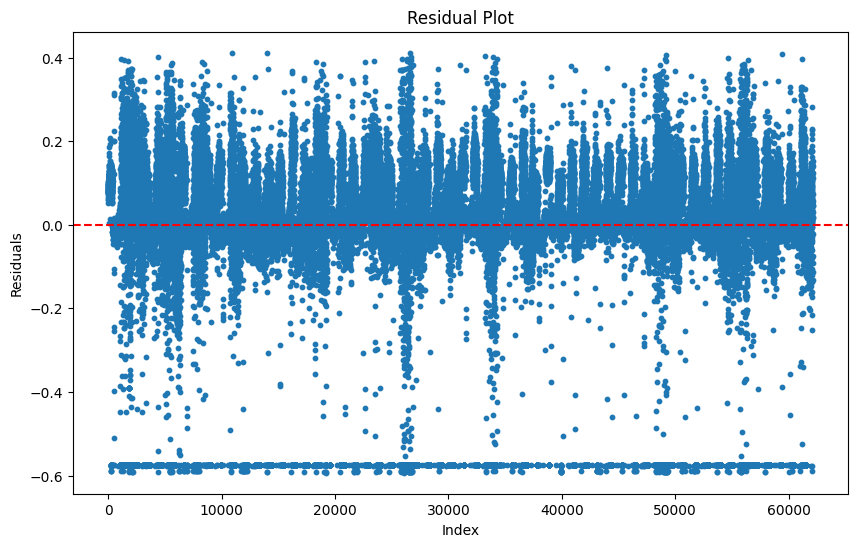

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

# 激活Pandas DataFrame到R data.frame的自动转换
pandas2ri.activate()

# 加载R的INLA库
ro.r('library(INLA)')

def run_inla_model(formula, data):
    with localconverter(ro.default_converter + pandas2ri.converter):
        r_df = ro.conversion.py2rpy(data)

    # 创建滞后变量
    ro.r('r_df$HeatCount_lag1 <- c(NA, head(r_df$HeatCount, -1))')
    ro.r('r_df$HeatCount_lag2 <- c(NA, NA, head(r_df$HeatCount, -2))')
    ro.r('r_df$HeatCount_lag3 <- c(NA, NA, NA, head(r_df$HeatCount, -3))')

    inla_call = f"""
    result <- inla(formula = {formula}, data = r_df, family = 'gaussian',
                   control.predictor = list(compute = TRUE))
    """
    ro.r(inla_call)
    return ro.r('result')

def plot_diagnostics(result, data):
    # 提取残差
    fitted_values = ro.r('result$summary.fitted.values$mean')
    residuals = data['SentimentScore'] - fitted_values

    # 绘制残差图
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(residuals)), residuals, s=10)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residual Plot')
    plt.xlabel('Index')
    plt.ylabel('Residuals')
    plt.show()

# 加载数据
df = pd.read_csv('/content/TestData_California.csv')

# 更新模型公式
lagged_formula = "SentimentScore ~ HeatCount + HeatCount_lag1 + HeatCount_lag2 + HeatCount_lag3"

# 运行模型
print("Running model with lagged HeatCount")
result = run_inla_model(lagged_formula, df)

# 打印模型摘要
ro.r('print(summary(result))')

# 绘制诊断图
plot_diagnostics(result, df)

In [25]:
import pandas as pd
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

# 激活Pandas DataFrame到R data.frame的自动转换
pandas2ri.activate()

# 加载INLA库
ro.r('library(INLA)')

def run_inla_model(formula, data, model_name):
    with localconverter(ro.default_converter + pandas2ri.converter):
        r_df = ro.conversion.py2rpy(data)

    # 在R中创建滞后变量(如果需要)
    if 'lag' in formula:
        ro.r('r_df$HeatCount_lag1 <- c(NA, head(r_df$HeatCount, -1))')
        ro.r('r_df$HeatCount_lag2 <- c(NA, NA, head(r_df$HeatCount, -2))')
        ro.r('r_df$HeatCount_lag3 <- c(NA, NA, NA, head(r_df$HeatCount, -3))')

    inla_call = f"""
    result <- inla(formula = {formula}, data = r_df, family = 'gaussian',
                   control.predictor = list(compute = TRUE))
    """
    ro.r(inla_call)
    ro.r(f'print(summary(result), digits = 3)')
    print(f"模型: {model_name}")
    print(f"边际对数似然: {ro.r('result$mlik')[0]}")
    print()

# 加载数据
df = pd.read_csv('/content/TestData_California.csv')

# 运行不包含滞后变量的模型
base_formula = "SentimentScore ~ HeatCount"
print("运行不包含滞后变量的模型")
run_inla_model(base_formula, df, "基础模型")

# 运行包含滞后变量的模型
lagged_formula = "SentimentScore ~ HeatCount + HeatCount_lag1 + HeatCount_lag2 + HeatCount_lag3"
print("运行包含滞后变量的模型")
run_inla_model(lagged_formula, df, "滞后模型")

运行不包含滞后变量的模型


/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():



Call:
   c("inla.core(formula = formula, family = family, contrasts = contrasts, 
   ", " data = data, quantiles = quantiles, E = E, offset = offset, ", " 
   scale = scale, weights = weights, Ntrials = Ntrials, strata = strata, 
   ", " lp.scale = lp.scale, link.covariates = link.covariates, verbose = 
   verbose, ", " lincomb = lincomb, selection = selection, control.compute 
   = control.compute, ", " control.predictor = control.predictor, 
   control.family = control.family, ", " control.inla = control.inla, 
   control.fixed = control.fixed, ", " control.mode = control.mode, 
   control.expert = control.expert, ", " control.hazard = control.hazard, 
   control.lincomb = control.lincomb, ", " control.update = 
   control.update, control.lp.scale = control.lp.scale, ", " 
   control.pardiso = control.pardiso, only.hyperparam = only.hyperparam, 
   ", " inla.call = inla.call, inla.arg = inla.arg, num.threads = 
   num.threads, ", " keep = keep, working.directory = working.directory,

运行不包含滞后变量的模型


/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():



Call:
   c("inla.core(formula = formula, family = family, contrasts = contrasts, 
   ", " data = data, quantiles = quantiles, E = E, offset = offset, ", " 
   scale = scale, weights = weights, Ntrials = Ntrials, strata = strata, 
   ", " lp.scale = lp.scale, link.covariates = link.covariates, verbose = 
   verbose, ", " lincomb = lincomb, selection = selection, control.compute 
   = control.compute, ", " control.predictor = control.predictor, 
   control.family = control.family, ", " control.inla = control.inla, 
   control.fixed = control.fixed, ", " control.mode = control.mode, 
   control.expert = control.expert, ", " control.hazard = control.hazard, 
   control.lincomb = control.lincomb, ", " control.update = 
   control.update, control.lp.scale = control.lp.scale, ", " 
   control.pardiso = control.pardiso, only.hyperparam = only.hyperparam, 
   ", " inla.call = inla.call, inla.arg = inla.arg, num.threads = 
   num.threads, ", " keep = keep, working.directory = working.directory,

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36793 (\N{CJK UNIFIED IDEOGRAPH-8FB9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38469 (\N{CJK UNIFIED IDEOGRAPH-9645}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20284 (\N{CJK UNIFIED IDEOGRAPH-4F3C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

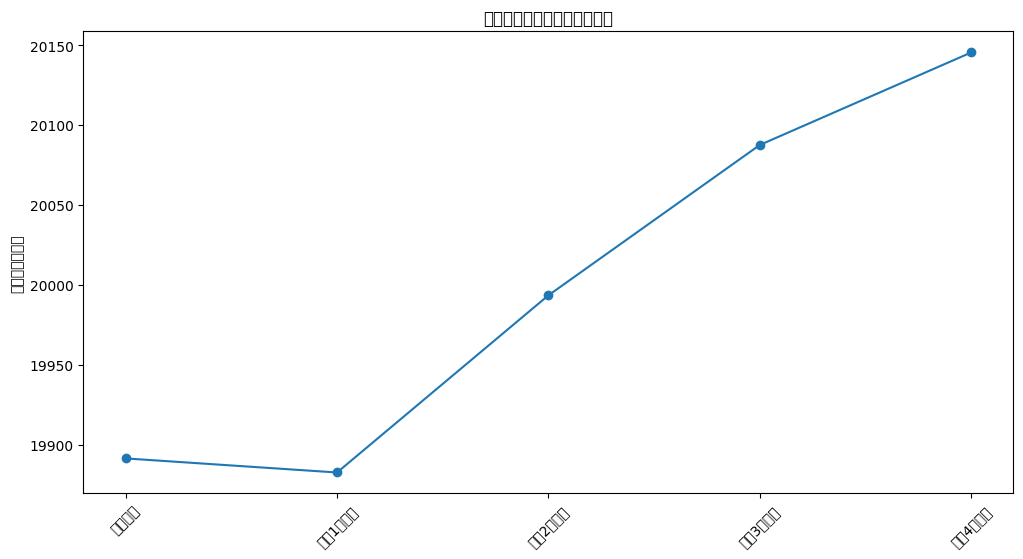

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

# 激活Pandas DataFrame到R data.frame的自动转换
pandas2ri.activate()

# 加载INLA库
ro.r('library(INLA)')

def run_inla_model(formula, data, model_name):
    with localconverter(ro.default_converter + pandas2ri.converter):
        r_df = ro.conversion.py2rpy(data)

    # 在R中创建滞后变量(如果需要)
    if 'lag' in formula:
        formula_parts = formula.split('~')
        lags = []
        for term in formula_parts[1].split('+'):
            if 'lag' in term:
                lag_term = term.strip().split('_')[-1]  # e.g., 'lag7'
                lag = int(''.join(filter(str.isdigit, lag_term)))  # 提取数字部分
                lags.append(lag)
        for lag in lags:
            ro.r(f'r_df$HeatCount_lag{lag} <- c({",".join(["NA"]*lag)}, head(r_df$HeatCount, -{lag}))')

    inla_call = f"""
    result <- inla(formula = {formula}, data = r_df, family = 'gaussian',
                   control.predictor = list(compute = TRUE))
    """
    ro.r(inla_call)
    ro.r(f'print(summary(result), digits = 3)')
    mlik = ro.r('result$mlik')[0]
    print(f"模型: {model_name}")
    print(f"边际对数似然: {mlik}")
    print()
    return mlik

# 加载数据
df = pd.read_csv('/content/TestData_California.csv')

# 存储模型边际对数似然值
mliks = []
models = []

# 运行不包含滞后变量的模型
base_formula = "SentimentScore ~ HeatCount"
print("运行不包含滞后变量的模型")
base_mlik = run_inla_model(base_formula, df, "基础模型")
mliks.append(base_mlik)
models.append("基础模型")

# 运行包含不同滞后周期的模型
for lag_weeks in range(1, 5):
    lagged_formula = "SentimentScore ~ HeatCount"
    for i in range(1, lag_weeks + 1):
        lagged_formula += f" + HeatCount_lag{i*7}"  # 每周滞后7天
    model_name = f"滞后{lag_weeks}周模型"
    print(f"运行包含滞后{lag_weeks}周的模型")
    mlik = run_inla_model(lagged_formula, df, model_name)
    mliks.append(mlik)
    models.append(model_name)

# 绘制边际对数似然值变化趋势
plt.figure(figsize=(12, 6))
plt.plot(models, mliks, marker='o')
plt.xticks(rotation=45)
plt.ylabel('边际对数似然值')
plt.title('模型边际对数似然值变化趋势')
plt.show()
